# Video Link
https://www.loom.com/share/492c0509fd424ba9b426a89fba914de2

# Part 1

Q: Explain the concept of a perceptron, what it simulates and how it works.

A: A perceptron is based on how our brain works. It simulates an input going in and firing neurons which then returns an output. A perceptron has inputs that go into the system that then go through a computation to be passed into an activation function. It then is passed into an activation function to tell whether it “fires” or not if it reaches a certain value. These perceptrons are trained by adjusting the weights and bias based on the difference between the actual and predicted points. 

# Part 2

Q: Explain the concept of multidimensional tensor, and provide a mathematical example and a snippet of its implementation in code.

A: A multidimensional tensor is essentially a higher-dimensional generalization of vectors (1D) and matrices (2D). 

Here’s a simple analogy:

0D tensor: A single number (scalar)

1D tensor: A list of numbers (vector)

2D tensor: A table of numbers (matrix)

3D tensor: A stack of matrices, or a cube of numbers. Each "slice" of this cube would be a 2D matrix.

Tensor shape: torch.Size([3, 1203, 750])
Tensor data type: torch.float32
Tensor device: cpu
Tensor values range: (0.01568627543747425, 0.9843137264251709)


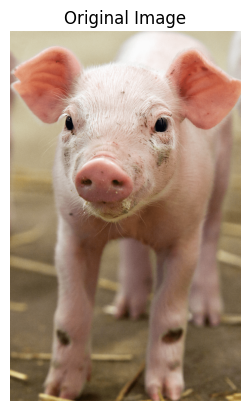

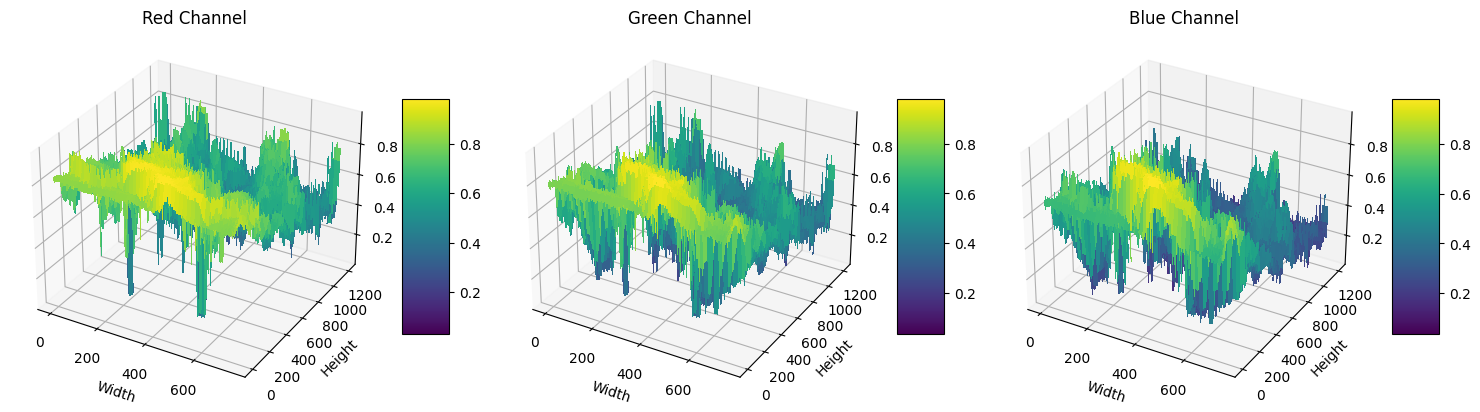

In [9]:
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def image_to_tensor(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img_array = np.array(img)
    img_tensor = torch.from_numpy(img_array).float().permute(2, 0, 1) / 255.0
    return img_tensor, img_array

def plot_image(image_array):
    # Display the image using matplotlib
    plt.imshow(image_array)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

def plot_3d_tensor(tensor):
    # Convert tensor to numpy array and transpose to (H, W, C)
    img_array = tensor.permute(1, 2, 0).numpy()
    
    # Create coordinate matrices
    x, y = np.meshgrid(np.arange(img_array.shape[1]), np.arange(img_array.shape[0]))
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(15, 5))
    
    channel_names = ['Red', 'Green', 'Blue']
    
    for i in range(3):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        
        # Plot the surface
        surf = ax.plot_surface(x, y, img_array[:,:,i], cmap='viridis', 
                               linewidth=0, antialiased=False)
        
        ax.set_title(f'{channel_names[i]} Channel')
        ax.set_xlabel('Width')
        ax.set_ylabel('Height')
        ax.set_zlabel('Intensity')
        
        # Add a color bar
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "pig.jpg"
tensor, image_array = image_to_tensor(image_path)

print(f"Tensor shape: {tensor.shape}")
print(f"Tensor data type: {tensor.dtype}")
print(f"Tensor device: {tensor.device}")
print(f"Tensor values range: ({tensor.min().item()}, {tensor.max().item()})")

# Show the original image
plot_image(image_array)

# Plot the 3D tensor channels
plot_3d_tensor(tensor)
